# Incident Management Process

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dataset = pd.read_csv(r'E:\Study\Aegis\ML Projects\incident_event_log.csv')

In [4]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29-02-2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,01-03-2016 09:52,06-03-2016 10:00


In [5]:
dataset.shape

(5998, 36)

Now we need to identify the columns in dataset which have '?' inplace of nan or blank values and then give suitable replacement

In [6]:
print(dataset.columns)

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')


In [7]:
cols = list(dataset.columns) #to create a list of all the columns
print(cols)

['number', 'incident_state', 'active', 'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 36 columns):
number                     5998 non-null object
incident_state             5998 non-null object
active                     5998 non-null bool
reassignment_count         5998 non-null int64
reopen_count               5998 non-null int64
sys_mod_count              5998 non-null int64
made_sla                   5998 non-null bool
caller_id                  5998 non-null object
opened_by                  5998 non-null object
opened_at                  5998 non-null object
sys_created_by             5998 non-null object
sys_created_at             5998 non-null object
sys_updated_by             5998 non-null object
sys_updated_at             5998 non-null object
contact_type               5998 non-null object
location                   5998 non-null object
category                   5998 non-null object
subcategory                5998 non-null object
u_symptom                  5998 non-

As python is reading values '?' as relevant we need to find out the columns containing such values and replace them with NaN so that further analysis can be done.

In [9]:
null = [] #An empty list to save all the column names with '?' as a value
for i in range(0,len(cols)):
    a = list(pd.unique(dataset[cols[i]]))
    for j in range(0,len(a)):
        if a[j] == '?':
            null.append(cols[i])
            #print(cols[i])
        else:
            pass
print(null) 

['opened_by', 'sys_created_by', 'sys_created_at', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'assignment_group', 'assigned_to', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_at']


In [10]:
dataset_1 = dataset.replace(to_replace ="?",value = np.nan)
dataset_1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29-02-2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29-02-2016 11:29,05-03-2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29-02-2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,01-03-2016 09:52,06-03-2016 10:00


In [11]:
dataset_1.info()
dataset_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 36 columns):
number                     5998 non-null object
incident_state             5998 non-null object
active                     5998 non-null bool
reassignment_count         5998 non-null int64
reopen_count               5998 non-null int64
sys_mod_count              5998 non-null int64
made_sla                   5998 non-null bool
caller_id                  5998 non-null object
opened_by                  5330 non-null object
opened_at                  5998 non-null object
sys_created_by             4370 non-null object
sys_created_at             4370 non-null object
sys_updated_by             5998 non-null object
sys_updated_at             5998 non-null object
contact_type               5998 non-null object
location                   5985 non-null object
category                   5965 non-null object
subcategory                5965 non-null object
u_symptom                  4304 non-

number                        0
incident_state                0
active                        0
reassignment_count            0
reopen_count                  0
sys_mod_count                 0
made_sla                      0
caller_id                     0
opened_by                   668
opened_at                     0
sys_created_by             1628
sys_created_at             1628
sys_updated_by                0
sys_updated_at                0
contact_type                  0
location                     13
category                     33
subcategory                  33
u_symptom                  1694
cmdb_ci                    5934
impact                        0
urgency                       0
priority                      0
assignment_group            145
assigned_to                1707
knowledge                     0
u_priority_confirmation       0
notify                        0
problem_id                 5719
rfc                        5845
vendor                     5998
caused_b

## Feature Analysis

As we have to fill up the null values, we will do feature analysis so that proper interpretation can be found to fill up those NaN values and irrelevant features can be dropped out.

In [12]:
categorical = [col for col in dataset_1.columns if dataset_1[col].dtype==object]
numerical = [col for col in dataset_1.columns if dataset_1[col].dtype!=object]

In [13]:
print(categorical)

['number', 'incident_state', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'notify', 'problem_id', 'rfc', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']


In [14]:
print(numerical)

['active', 'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla', 'knowledge', 'u_priority_confirmation', 'vendor']


In [15]:
print(dataset_1.shape)
print(dataset_1.describe(include='all'))

(5998, 36)
            number incident_state active  reassignment_count  reopen_count  \
count         5998           5998   5998         5998.000000   5998.000000   
unique         890              8      2                 NaN           NaN   
top     INC0000990            New   True                 NaN           NaN   
freq            28           1638   5101                 NaN           NaN   
mean           NaN            NaN    NaN            1.140380      0.012504   
std            NaN            NaN    NaN            1.922016      0.118395   
min            NaN            NaN    NaN            0.000000      0.000000   
25%            NaN            NaN    NaN            0.000000      0.000000   
50%            NaN            NaN    NaN            0.000000      0.000000   
75%            NaN            NaN    NaN            1.000000      0.000000   
max            NaN            NaN    NaN           18.000000      2.000000   

        sys_mod_count made_sla    caller_id       op

In [16]:
print(len(categorical))
print(len(numerical))

28
8


As on categorical we cannot just randomly fill the nan value, what we can do is to assign them a separate class in every categorical column. Below program does so with the use of dictionary. This program will also encode the datapoints into integer format.

In [17]:
for col in categorical:
    temp = {}
    count = 0
    for val in dataset_1[col].values:
        try:
            temp[val]
        except:
            temp[val] = count
            count += 1
    dataset_1[col] = [temp[x] for x in dataset_1[col].values]

In [18]:
print(dataset_1[categorical])

      number  incident_state  caller_id  opened_by  opened_at  sys_created_by  \
0          0               0          0          0          0               0   
1          0               1          0          0          0               0   
2          0               1          0          0          0               0   
3          0               2          0          0          0               0   
4          1               0          0          1          1               1   
5          1               3          0          1          1               1   
6          1               3          0          1          1               1   
7          1               3          0          1          1               1   
8          1               3          0          1          1               1   
9          1               3          0          1          1               1   
10         1               4          0          1          1               1   
11         1               1

In [19]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 36 columns):
number                     5998 non-null int64
incident_state             5998 non-null int64
active                     5998 non-null bool
reassignment_count         5998 non-null int64
reopen_count               5998 non-null int64
sys_mod_count              5998 non-null int64
made_sla                   5998 non-null bool
caller_id                  5998 non-null int64
opened_by                  5998 non-null int64
opened_at                  5998 non-null int64
sys_created_by             5998 non-null int64
sys_created_at             5998 non-null int64
sys_updated_by             5998 non-null int64
sys_updated_at             5998 non-null int64
contact_type               5998 non-null int64
location                   5998 non-null int64
category                   5998 non-null int64
subcategory                5998 non-null int64
u_symptom                  5998 non-null int64
cm

                   features  uniques
0                    number      890
1            incident_state        8
2                    active        2
3        reassignment_count       19
4              reopen_count        3
5             sys_mod_count       80
6                  made_sla        2
7                 caller_id      639
8                 opened_by       57
9                 opened_at      717
10           sys_created_by       56
11           sys_created_at      522
12           sys_updated_by      171
13           sys_updated_at     3499
14             contact_type        1
15                 location       85
16                 category       32
17              subcategory      108
18                u_symptom      134
19                  cmdb_ci        5
20                   impact        3
21                  urgency        3
22                 priority        4
23         assignment_group       62
24              assigned_to      123
25                knowledge        2
2

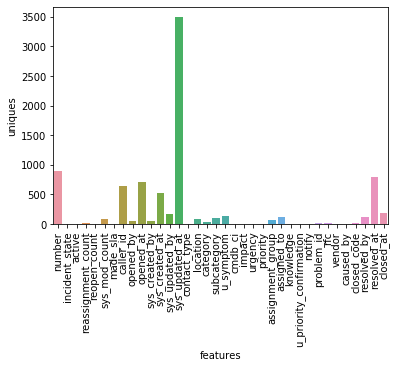

In [20]:
#Check the unique values
nu = dataset_1.nunique().reset_index()
nu.columns = ['features', 'uniques']
ax = sns.barplot(x='features', y='uniques', data=nu)
ax.tick_params(axis='x', rotation=90)
print(nu)

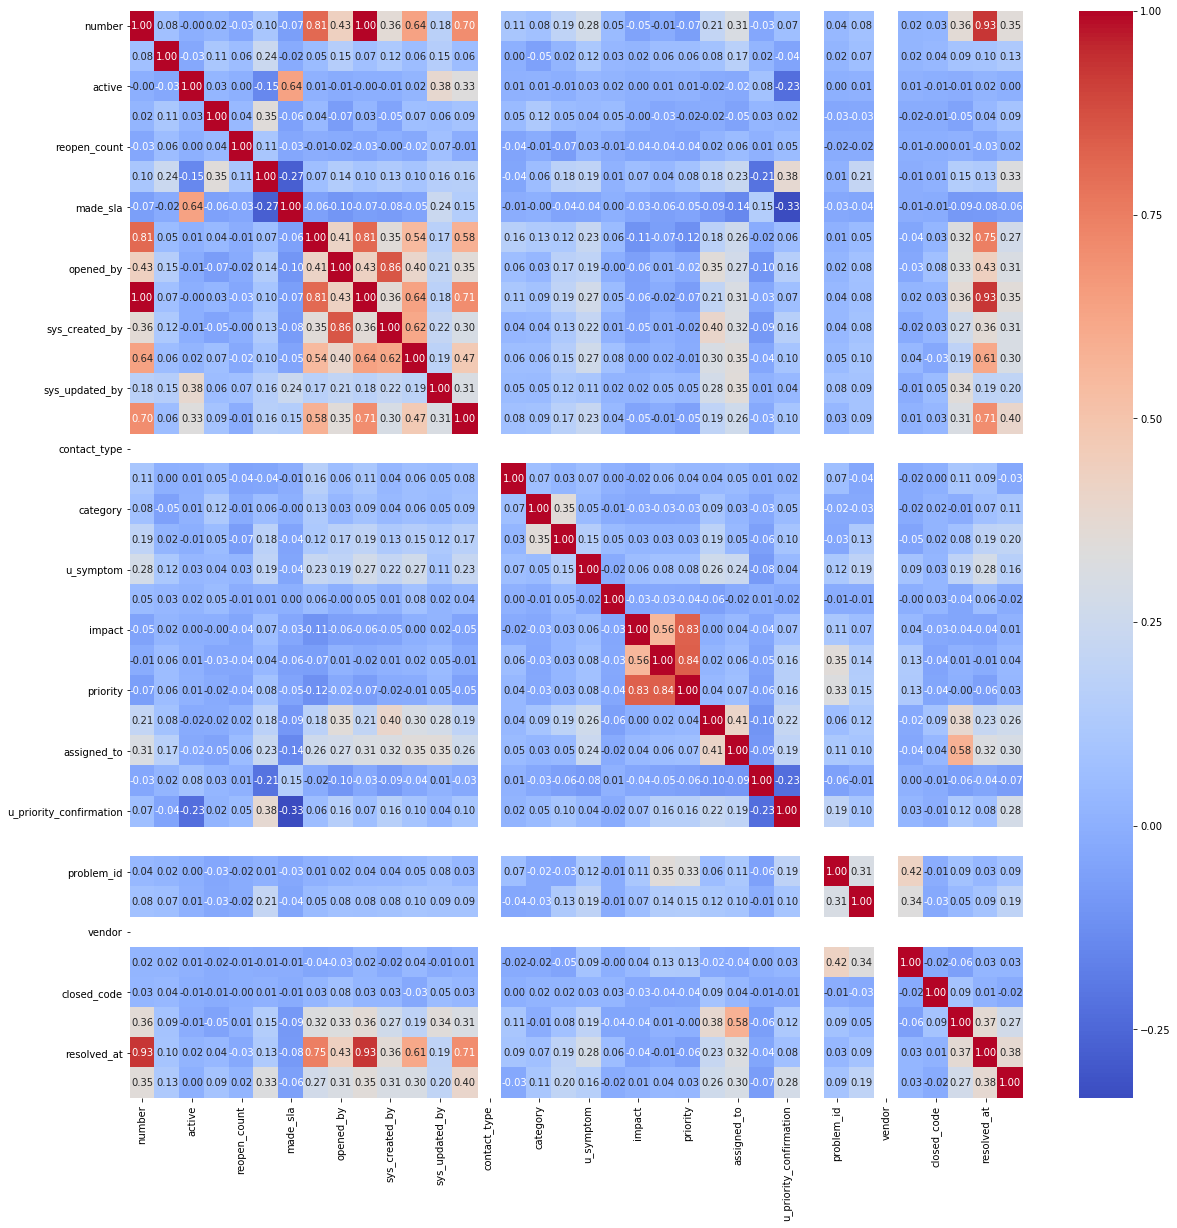

In [21]:
g = sns.heatmap(dataset_1.corr(),annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [22]:
corr = dataset_1.corr()
corr

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
number,1.000000,0.076401,-0.001892,0.022087,-0.034595,0.104642,-0.068283,0.808753,0.432308,0.998625,...,0.071418,NaN,0.036081,0.080095,NaN,0.021879,0.030419,0.362810,0.931266,0.351117
incident_state,0.076401,1.000000,-0.027589,0.111276,0.057813,0.241148,-0.017563,0.052996,0.150499,0.072965,...,-0.043312,NaN,0.020863,0.072046,NaN,0.022830,0.038481,0.089475,0.097588,0.125729
active,-0.001892,-0.027589,1.000000,0.029171,0.000854,-0.146008,0.636594,0.008392,-0.014701,-0.000815,...,-0.228466,NaN,0.001811,0.005926,NaN,0.006787,-0.005005,-0.007463,0.017357,0.003493
reassignment_count,0.022087,0.111276,0.029171,1.000000,0.041381,0.347258,-0.057089,0.041110,-0.071180,0.029980,...,0.019896,NaN,-0.033713,-0.026876,NaN,-0.016082,-0.012486,-0.049865,0.040612,0.092094
reopen_count,-0.034595,0.057813,0.000854,0.041381,1.000000,0.107609,-0.033970,-0.009660,-0.020404,-0.034609,...,0.054598,NaN,-0.016119,-0.015183,NaN,-0.005546,-0.001317,0.005777,-0.026580,0.023104
sys_mod_count,0.104642,0.241148,-0.146008,0.347258,0.107609,1.000000,-0.272987,0.067013,0.141343,0.100134,...,0.375330,NaN,0.005704,0.214512,NaN,-0.006303,0.006900,0.149994,0.131395,0.326965
made_sla,-0.068283,-0.017563,0.636594,-0.057089,-0.033970,-0.272987,1.000000,-0.055750,-0.096058,-0.067229,...,-0.334391,NaN,-0.030786,-0.039416,NaN,-0.007780,-0.011749,-0.088380,-0.081855,-0.060295
caller_id,0.808753,0.052996,0.008392,0.041110,-0.009660,0.067013,-0.055750,1.000000,0.414339,0.811228,...,0.059268,NaN,0.005562,0.048166,NaN,-0.037553,0.028101,0.323583,0.747129,0.271113
opened_by,0.432308,0.150499,-0.014701,-0.071180,-0.020404,0.141343,-0.096058,0.414339,1.000000,0.428475,...,0.157287,NaN,0.021268,0.079202,NaN,-0.031458,0.076191,0.328780,0.432644,0.308016
opened_at,0.998625,0.072965,-0.000815,0.029980,-0.034609,0.100134,-0.067229,0.811228,0.428475,1.000000,...,0.069302,NaN,0.036903,0.076176,NaN,0.021435,0.030165,0.363069,0.931792,0.349161


In [23]:
dataset_temp = dataset_1.loc[:, dataset_1.columns != 'impact'] 

In [24]:
corr = dataset_1.corr()
drop_cols = []
for col in dataset_temp.columns:
    if sum(corr[col].map(lambda x: abs(x) > 0.1)) <= 5:
        drop_cols.append(col)
dataset_1.drop(drop_cols, axis=1, inplace=True)
print(drop_cols)

['reassignment_count', 'reopen_count', 'contact_type', 'location', 'category', 'cmdb_ci', 'knowledge', 'notify', 'vendor', 'caused_by', 'closed_code']


In [25]:
dataset_1.columns

Index(['number', 'incident_state', 'active', 'sys_mod_count', 'made_sla',
       'caller_id', 'opened_by', 'opened_at', 'sys_created_by',
       'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'subcategory',
       'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'u_priority_confirmation', 'problem_id', 'rfc',
       'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

## Splitting Training and Testing Set

In [26]:
from sklearn.model_selection import train_test_split
X = dataset_1.loc[:, dataset_1.columns != 'impact'] 
y = dataset_1.loc[:,dataset_1.columns == 'impact']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 10, stratify=y)

In [27]:
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3598, 24)
Number transactions y_train dataset:  (3598, 1)
Number transactions X_test dataset:  (2400, 24)
Number transactions y_test dataset:  (2400, 1)


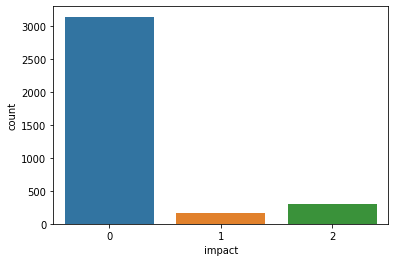

In [28]:
sns.countplot(x = 'impact',data = y_train)
plt.show()

The Above countplot shows the Class Imbalance.
To deal with it we will use SMOTE Technique.

In [29]:
from imblearn.over_sampling import SMOTE as sm

In [30]:
smo = sm(random_state = 2) 
X_train_res, y_train_res = smo.fit_sample(X_train, y_train.values.ravel()) 

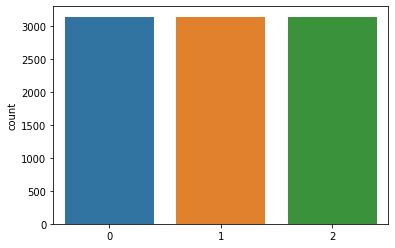

In [31]:
l = list(y_train_res)
sns.countplot(x = l)
plt.show()

Now as the Classes are balanced with oversampling technique, now we will move forward for modeling

## Simple Modeling

In [32]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import StratifiedKFold

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [34]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### KNearestNeighbors Classifier

In [35]:
cv = StratifiedKFold(n_splits= 10)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()

In [37]:
k_param_grid = {"n_neighbors":[5,10,15,20],
               "metric" : ['minkowski','euclidean','manhattan',"chebyshev"]
               }
k_NN = GridSearchCV(k,param_grid = k_param_grid, cv=cv, scoring="accuracy", n_jobs= 4, verbose = 1)
k_NN.fit(X_train_res,y_train_res)
k_NN_best = k_NN.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:   15.3s finished


In [38]:
k_NN_best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
k_NN.best_score_

0.9461961306126494

In [40]:
k_NN_m = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                              metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                              weights='uniform')

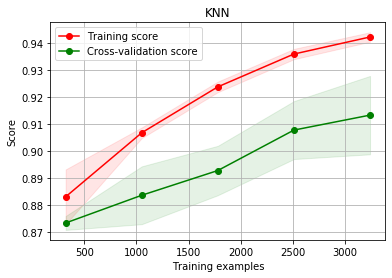

In [88]:
g = plot_learning_curve(k_NN_m,"KNN",X_train,y_train,cv=cv)

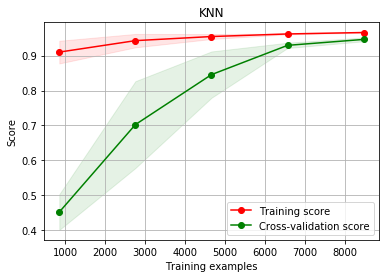

In [72]:
g = plot_learning_curve(k_NN_m,"KNN",X_train_res,y_train_res,cv=cv)

In [22]:
v = k_NN_m.fit(X_train_res,y_train_res)

In [23]:
c = v.predict(X_test)

In [24]:
y_score = v.score(X_test, y_test, sample_weight=None)

In [25]:
y_score

0.8525

In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report

In [24]:
from sklearn import preprocessing

In [25]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [29]:
multiclass_roc_auc_score(y_test,c)

0.8588611324452464

In [30]:
print(classification_report(y_test, c))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      2095
           1       0.37      0.75      0.50       110
           2       0.48      0.82      0.61       195

    accuracy                           0.85      2400
   macro avg       0.61      0.81      0.67      2400
weighted avg       0.91      0.85      0.87      2400



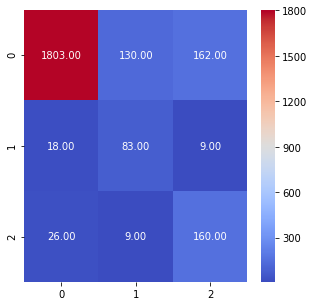

In [31]:
cfm_vpc = confusion_matrix(y_test, c)
sns.heatmap(cfm_vpc, annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

### Support Vector Classifier

In [26]:
from sklearn.svm import SVC

In [27]:
svc_c = SVC(random_state = 2)

In [34]:
svc_param_grid = {'kernel': ['sigmoid','rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50],
                 'probability': [True],
                  'tol': [0.001, 0.01, 0.1, 1],
                 'decision_function_shape':['ovr','ovo'],
                 }

In [32]:
gsSVMC = GridSearchCV(svc_c,param_grid = svc_param_grid, cv=cv, scoring="accuracy", n_jobs= -1, verbose = 1)

In [33]:
gsSVMC.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 157.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 288.2min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 356.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=2, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50], 'decision_function_shape': ['ovr'],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['sigmoid', 'rbf'], 'probability': [True],
                         'tol': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [34]:
gsSVMC_best = gsSVMC.best_estimator_

In [35]:
gsSVMC_best

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=2, shrinking=True, tol=1,
    verbose=False)

In [40]:
gsSVMC_m = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=2, shrinking=True, tol=1,
    verbose=False)

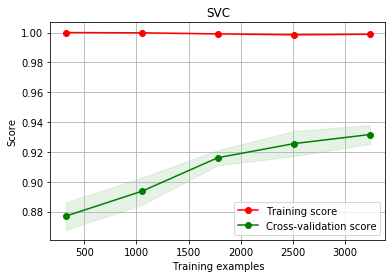

In [41]:
g = plot_learning_curve(gsSVMC_m,"SVC",X_train,y_train,cv=cv)

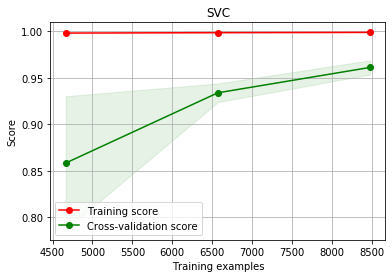

In [42]:
g = plot_learning_curve(gsSVMC_m,"SVC",X_train_res,y_train_res,cv=cv)

In [43]:
v1 = gsSVMC_m.fit(X_train_res,y_train_res)

In [44]:
c1 = v1.predict(X_test)

In [45]:
y_score = v1.score(X_test, y_test, sample_weight=None)
y_score

0.9275

In [46]:
multiclass_roc_auc_score(y_test,c1)

0.7800332190653855

In [47]:
print(classification_report(y_test, c1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2095
           1       0.70      0.56      0.63       110
           2       0.84      0.57      0.68       195

    accuracy                           0.93      2400
   macro avg       0.83      0.71      0.76      2400
weighted avg       0.92      0.93      0.92      2400



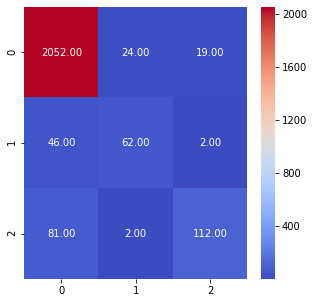

In [48]:
cfm_vpc = confusion_matrix(y_test, c1)
sns.heatmap(cfm_vpc, annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
DTC = DecisionTreeClassifier()
DTC_param_grid = {'criterion' : ['gini','entropy'],
                 'splitter' : ['best','random'],
                  'max_depth':[2,3,4],
                  "min_samples_split": [1,2, 3,5,10],
                  "min_samples_leaf": [1,2,3,5,10]
                 }
gsDTC = GridSearchCV(DTC,param_grid = DTC_param_grid, cv=cv, scoring="accuracy", n_jobs= -1, verbose = 1)

In [85]:
gsDTC.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 662 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1662 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   46.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
      

In [86]:
gsDTC_best = gsDTC.best_estimator_

In [87]:
gsDTC_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
gsDTC_m = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

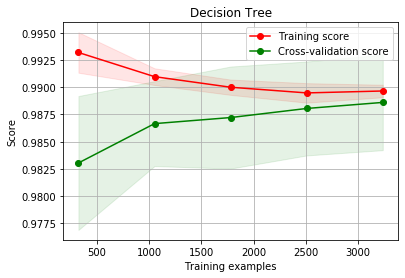

In [86]:
g = plot_learning_curve(gsDTC_m,"Decision Tree",X_train,y_train,cv=cv)

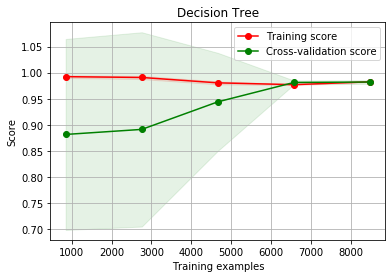

In [74]:
g = plot_learning_curve(gsDTC_m,"Decision Tree",X_train_res,y_train_res,cv=cv)

In [45]:
v2 = gsDTC_m.fit(X_train_res,y_train_res)

In [46]:
c2 = v2.predict(X_test)

In [47]:
y_score = v2.score(X_test, y_test, sample_weight=None)
y_score

0.9841666666666666

In [48]:
multiclass_roc_auc_score(y_test,c2)

0.9941186971118171

In [49]:
print(classification_report(y_test, c2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2095
           1       0.96      1.00      0.98       110
           2       0.86      1.00      0.92       195

    accuracy                           0.98      2400
   macro avg       0.94      0.99      0.96      2400
weighted avg       0.99      0.98      0.98      2400



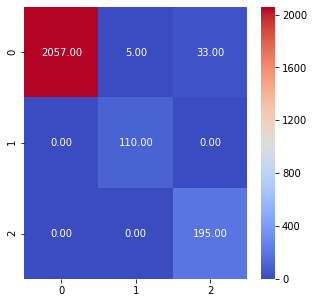

In [50]:
cfm_vpc = confusion_matrix(y_test, c2)
sns.heatmap(cfm_vpc, annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


rf_param_grid = {"max_depth": [2,3],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[50,100,300],
              "criterion": ["gini","entropy"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=cv, scoring="accuracy", n_jobs= -1, verbose = 1)

In [115]:
gsRFC.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 20.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
        

In [116]:
gsRFC_best = gsRFC.best_estimator_
gsRFC_best

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
gsRFC_m = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

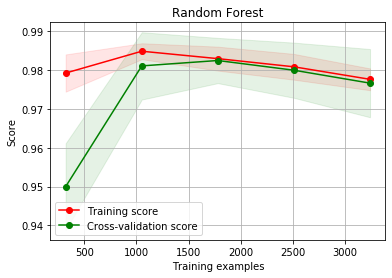

In [85]:
g = plot_learning_curve(gsRFC_m,"Random Forest",X_train,y_train,cv=cv)

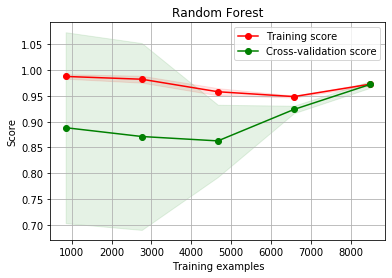

In [82]:
g = plot_learning_curve(gsRFC_m,"Random Forest",X_train_res,y_train_res,cv=cv)

In [54]:
v3 = gsRFC_m.fit(X_train_res,y_train_res)

In [55]:
c3 = v3.predict(X_test)

In [56]:
y_score = v3.score(X_test, y_test, sample_weight=None)
y_score

0.965

In [57]:
multiclass_roc_auc_score(y_test,c3)

0.9812510782786533

In [58]:
print(classification_report(y_test, c3))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2095
           1       0.92      0.96      0.94       110
           2       0.72      1.00      0.84       195

    accuracy                           0.96      2400
   macro avg       0.88      0.98      0.92      2400
weighted avg       0.97      0.96      0.97      2400



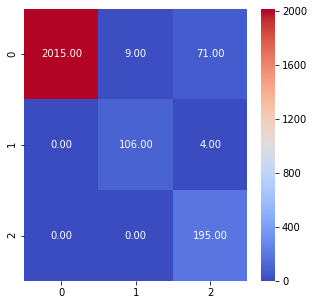

In [59]:
cfm_vpc = confusion_matrix(y_test, c3)
sns.heatmap(cfm_vpc, annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression 

In [61]:
lr = LogisticRegression() 
lr_param_grid = {'penalty':['l1','l2'],
                'tol':[1e-4,1e-3,1e-2,1e-5],
                 'C':[0.1, 1, 100],
                 'multi_class':['ovr','multinomial'],
                 'max_iter':[1000],
                 'solver':['newton_cg','sag','saga','lbfgs']
                }
gslr = GridSearchCV(lr,param_grid = lr_param_grid, cv=cv, scoring="accuracy", n_jobs= -1, verbose = 1)

In [143]:
gslr.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 763 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 68.4min finished
E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numb

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 100], 'max_iter': [1000],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton_cg', 'sag', 'saga', 'lbfgs'],
                         't

In [144]:
gslr_best = gslr.best_estimator_
gslr_best

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
gslr_m = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

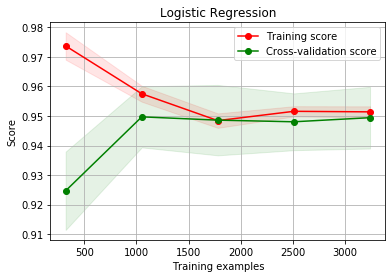

In [84]:
g = plot_learning_curve(gslr_m,"Logistic Regression",X_train,y_train,cv=cv)

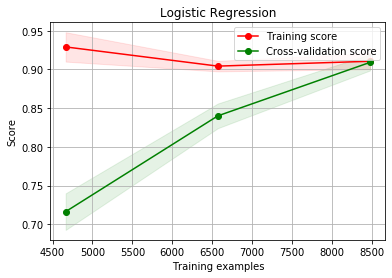

In [83]:
g = plot_learning_curve(gslr_m,"Logistic Regression",X_train_res,y_train_res,cv=cv)

In [63]:
v4 = gslr_m.fit(X_train_res,y_train_res)

E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [64]:
c4 = v4.predict(X_test)

In [65]:
y_score = v4.score(X_test, y_test, sample_weight=None)
y_score

0.9425

In [66]:
multiclass_roc_auc_score(y_test,c4) #(true,predicted)

0.902959823948108

In [67]:
print(classification_report(y_test, c4))#(true,Predicted)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2095
           1       0.70      0.61      0.65       110
           2       0.63      0.92      0.75       195

    accuracy                           0.94      2400
   macro avg       0.78      0.83      0.79      2400
weighted avg       0.95      0.94      0.95      2400



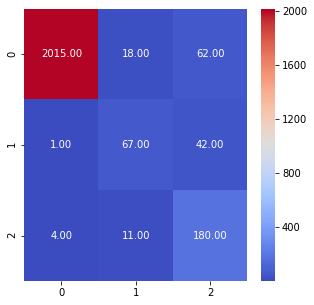

In [68]:
cfm_vpc = confusion_matrix(y_test, c4)
sns.heatmap(cfm_vpc, annot=True,fmt = ".2f", cmap = "coolwarm")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

By Comparing all the classifiers used, Model trained with Decision Tree Classifier gave the best results.
Hence it is our best model.